# Universidad del Valle de Guatemala
18 Avenida 11-95 Guatemala      
Departamento de Computación     
Facultad de Ingeniería       
Minería de Datos Sección 10         
Fecha de entrega: 29/01/2024        

Grupo 6 | Integrantes:
- Diego Alexander Hernández Silvestre 21270
- Linda Inés Jimenez Vides 21169
- Daniel Armando Valdez Reyes 21240

## Hoja  de trabajo 2
Para realizar una exploración inicial del conjunto de datos, se prodeció a realizar un resumen de la información proporcionada en el dataset del archivo "*movies.csv*". A continuación se muestran los resultados: 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sb
import sklearn.cluster as cluster
import sklearn.metrics as metrics
import sklearn.preprocessing
import scipy.cluster.hierarchy as sch
import skfuzzy as fuzz
import pylab
import sklearn.mixture as mixture
import pyclustertend 
import random
from typing import *
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

C:\Users\danar\AppData\Local\Temp\ipykernel_19064\2029074696.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:


dataframe: pd.DataFrame = pd.read_csv("movies.csv",  encoding='ISO-8859-1')
rows_to_correct = dataframe[dataframe['actorsCharacter'].astype(str) == dataframe['id'].astype(str)]

# Realiza la corrección de valores
dataframe.loc[rows_to_correct.index, 'director'] = ''
dataframe.loc[rows_to_correct.index, 'actors'] = rows_to_correct['director']
dataframe.loc[rows_to_correct.index, 'actorsPopularity'] = rows_to_correct['actors']
dataframe.loc[rows_to_correct.index, 'actorsCharacter'] = rows_to_correct['actorsPopularity']

rows_to_correct = dataframe[dataframe['actorsPopularity'].astype(str) == 'TRUE']
dataframe.loc[rows_to_correct.index, 'actorsPopularity'] = rows_to_correct['video']
dataframe.loc[rows_to_correct.index, 'video'] = rows_to_correct['actors']

rows_to_correct = dataframe[dataframe['actorsPopularity'].astype(str) == 'FALSE']
dataframe.loc[rows_to_correct.index, 'actorsPopularity'] = rows_to_correct['video']
dataframe.loc[rows_to_correct.index, 'video'] = rows_to_correct['actors']


dataframe['castWomenAmount'] = pd.to_numeric(dataframe['castWomenAmount'], errors='coerce')
dataframe['castMenAmount'] = pd.to_numeric(dataframe['castMenAmount'], errors='coerce')

dataframeTo = dataframe.drop('id', axis=1)

dataframeTo.describe()

,budget,revenue,runtime,popularity,voteAvg,voteCount,genresAmount,productionCoAmount,productionCountriesAmount,actorsAmount,castWomenAmount,castMenAmount
count,1.000000e+04,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,9963.000000,9838.000000
mean,1.855163e+07,5.673793e+07,100.268100,51.393907,6.483490,1342.381800,2.596500,3.171400,1.751000,2147.666600,7004.157784,16557.193434
std,3.662669e+07,1.495854e+08,27.777829,216.729552,0.984274,2564.196637,1.154565,2.539738,3.012093,37200.075802,67239.619658,100455.960117
min,0.000000e+00,0.000000e+00,0.000000,4.258000,1.300000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000e+00,0.000000e+00,90.000000,14.577750,5.900000,120.000000,2.000000,2.000000,1.000000,13.000000,3.000000,7.000000
50%,5.000000e+05,1.631245e+05,100.000000,21.905500,6.500000,415.000000,3.000000,3.000000,1.000000,21.000000,6.000000,12.000000
75%,2.000000e+07,4.479661e+07,113.000000,40.654000,7.200000,1316.000000,3.000000,4.000000,2.000000,36.000000,10.000000,20.000000
max,3.800000e+08,2.847246e+09,750.000000,11474.647000,10.000000,30788.000000,16.000000,89.000000,155.000000,919590.000000,922162.000000,922017.000000


In [3]:
import numpy as np
# Dividir los valores y convertir a listas
dataframe = dataframe.assign(actorsPopularityStrArray=dataframe['actorsPopularity'].str.split('|', expand=False))
dataframe = dataframe.assign(genresArray=dataframe['genres'].str.split('|', expand=False))

def obtainPrincipal(x):
    if isinstance(x, list):
        return x[0]
    else:
        return ''

dataframe = dataframe.assign(principalGenre=dataframe['genresArray'].apply(lambda x: obtainPrincipal(x) if x is not None else ''))

def convert_to_numeric(lst):
    if lst:
        if isinstance(lst, list):
            return [float(value) for value in lst]
        else:
            return [float(lst)]
    else:
        return []


dataframe = dataframe.assign(actorsPopularityNumArray=dataframe['actorsPopularityStrArray'].apply(lambda x: convert_to_numeric(x) if x is not None else x))

dataframe = dataframe.assign(actorsMostPopularity= dataframe['actorsPopularityNumArray'].apply(lambda x: max(x)))
dataframe = dataframe.assign(actorsWorstPopularity= dataframe['actorsPopularityNumArray'].apply(lambda x: min(x)))
dataframe = dataframe.assign(actorsPopularityMean= dataframe['actorsPopularityNumArray'].apply(lambda x: np.mean(x)))
dataframe = dataframe.assign(actorsPopularityMedian= dataframe['actorsPopularityNumArray'].apply(lambda x: np.median(x)))

dataframe = dataframe[['popularity',
                    'actorsMostPopularity', 
                    'actorsWorstPopularity', 
                    'actorsPopularityMean',
                    'actorsPopularityMedian']]

#dataframe = dataframe[dataframe['principalGenre'] != '']

dataframe

,popularity,actorsMostPopularity,actorsWorstPopularity,actorsPopularityMean,actorsPopularityMedian
0,20.880,27.973,0.6,11.580640,7.9060
1,9.596,18.295,0.6,6.476200,4.3690
2,100.003,24.542,0.6,2.135924,0.9910
3,134.435,33.379,0.6,8.139208,8.3395
4,58.751,33.297,0.6,3.654921,1.6115
...,...,...,...,...,...
9995,16.662,18.185,0.6,2.678400,0.6000
9996,491.706,1.550,0.6,0.748750,0.6000
9997,565.658,1.400,0.6,0.730706,0.6000
9998,9.664,NaN,NaN,NaN,NaN


Descripción de las variables

- Id: Cualitativa Ordinal
- popularity: Cuantitativa Discreta
- budget: Cuantitativa Discreta
- revenue: Cuantitativa Discreta
- original_title: Cualitativa Nominal
- originalLanguage: Cualitativa Nominal
- title: Cualitativa Nominal
- homePage: Cualitativa Nominal
- video: Cualitativa Nominal
- director: Cualitativa Nominal
- runtime: Cuantitativa Continua
- genres: Cualitativa Nominal
- genresAmount: Cuantitativa Discreta
- productionCompany: Cualitativa Nominal
- productionCoAmount: Cuantitativa Discreta
- productionCompanyCountry: Cualitativa Nominal
- productionCountry: Cualitativa Nominal
- productionCountriesAmount: Cuantitativa Contable
- releaseDate: Cualitativa Ordinal
- voteCount: Cuantitativa Contable
- voteAvg: Cuantitativo Contable
- actors: Cualitativo Nominal
- actorsPopularity: Cuantitativa Discreta
- actorsCharacter: Cualitativa Nominal
- actorsAmount: Cuantitativa Discreta
- castWomenAmount: Cuantitativa Discreta
- castMenAmount: Cuantitativa Discreta

Descripción de variables a utilizar:
- popularity: Cuantitativa Discreta
- budget: Cuantitativa Discreta
- revenue: Cuantitativa Discreta
- runtime: Cuantitativa Continua
- genresAmount: Cuantitativa Discreta
- productionCoAmount: Cuantitativa Discreta
- productionCountriesAmount: Cuantitativa Contable
- actorsPopularity: Cuantitativa Discreta
- actorsAmount: Cuantitativa Discreta
- castWomenAmount: Cuantitativa Discreta
- castMenAmount: Cuantitativa Discreta

In [4]:
scaler = sklearn.preprocessing.StandardScaler()
random.seed(123)

dataScale = scaler.fit_transform(dataframe.dropna())

# Convierte los datos escalados de nuevo a un DataFrame
scaled_df = pd.DataFrame(dataScale, columns=dataframe.columns)



X = np.array(dataframe.dropna())
X.shape


(9912, 5)

In [5]:
pyclustertend.hopkins(X, len(X))

0.0053925251987551924

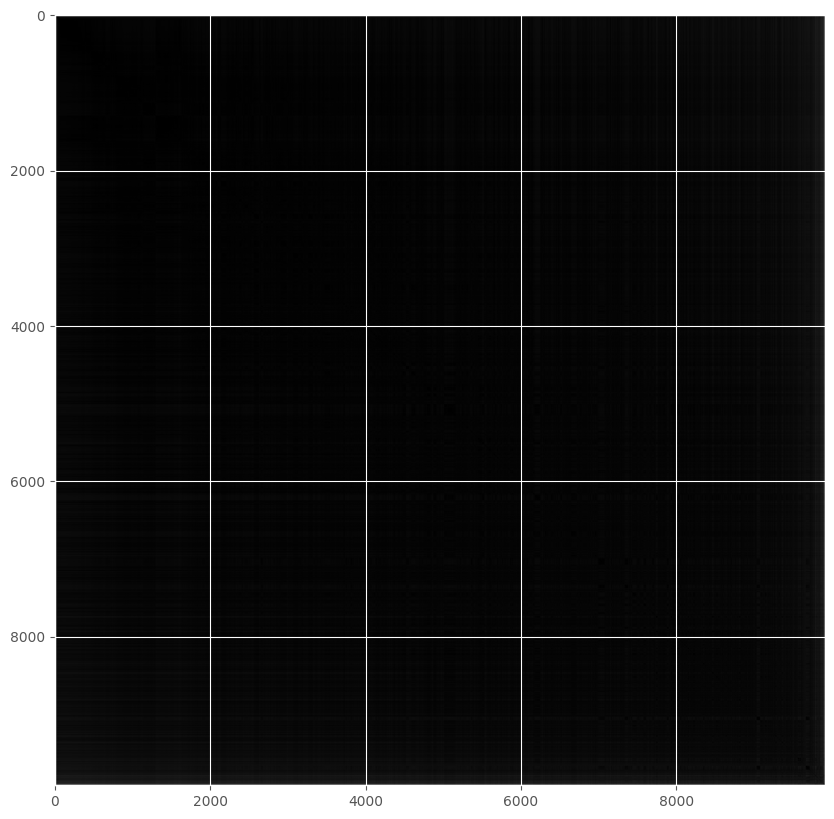

In [8]:
pyclustertend.vat(scaled_df)

C:\Users\danar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\danar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


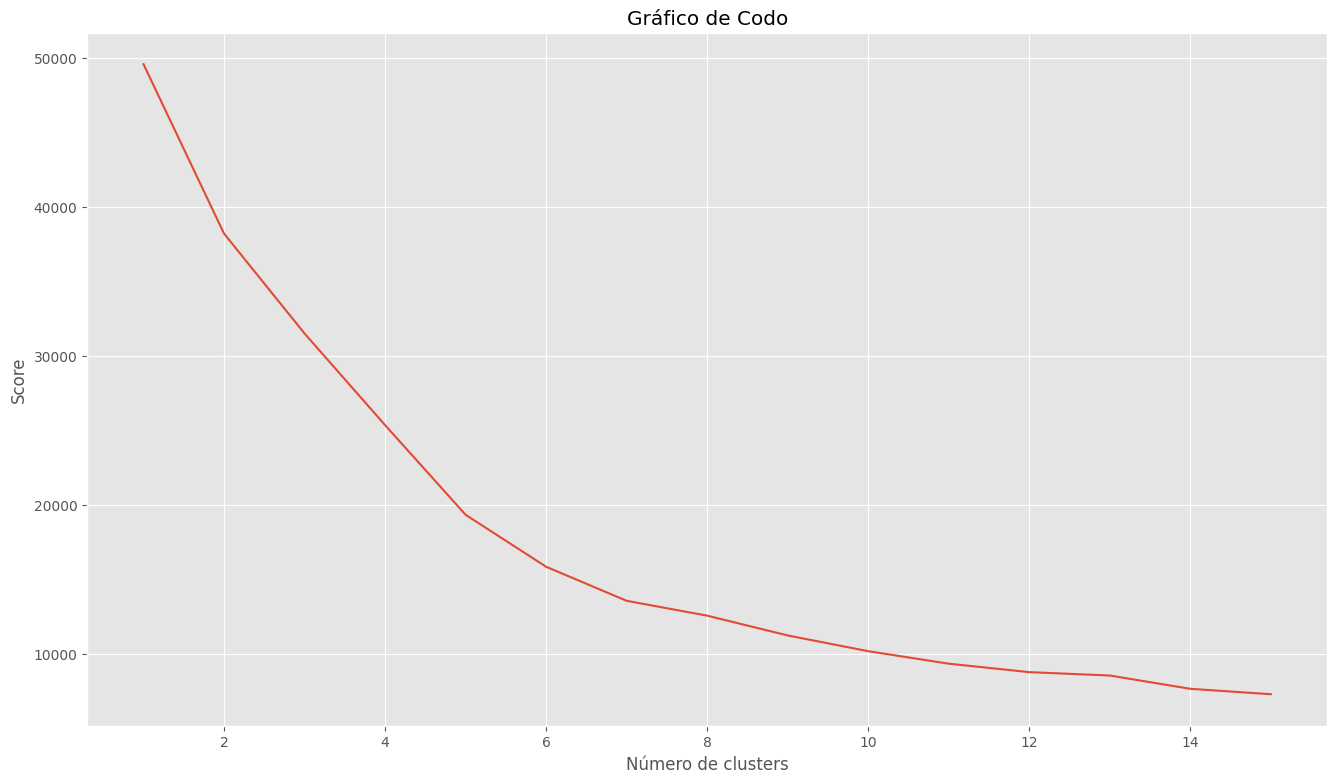

In [7]:
numeroClusters = range(1,16)
wcss = []
for i in numeroClusters:
    kmeans = cluster.KMeans(n_clusters=i)
    kmeans.fit(dataScale)
    wcss.append(kmeans.inertia_)

plt.plot(numeroClusters, wcss)
plt.xlabel("Número de clusters")
plt.ylabel("Score")
plt.title("Gráfico de Codo")
plt.show()

# k = 7 es un buen número

In [9]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np




[49560.000000000015, 38199.22106797107, 31497.031043951527, 25351.280802491805, 19336.32303393751, 15850.197470954738, 13565.294384416673, 12569.653214263937, 11241.388698224886, 10186.798295211278, 9347.87831317917, 8780.260421079438, 8554.177082417249, 7662.786622826086, 7299.12900366481]
range(1, 16)
